# Part I - Ford Go Bike Data Visualization
## by Amrita Bains

## Introduction
The Ford GoBike dataset has information on the bike riders (customer or subscribers) such as their trip times, start stations, end stations, etc and the bike rides are covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fordgobike = pd.read_csv('201902-fordgobike.csv')
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [3]:
fordgobike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [4]:
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
fordgobike.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [6]:
fordgobike.shape

(183412, 16)

### What is the structure of your dataset?
   
    The dataset has 16 columns and 183412 rows. 

### What is/are the main feature(s) of interest in your dataset?

    The main features of interest are:
    * the longest trip taken by a customer versus a subscriber.
    * the shortest trip taken by a customer versus a subscriber. 
    * the top 5 stations used by a customer versus a subscriber. 
    * the busiest and slowest month. 
    * the percentage of users use the fordgo bikes use the bike for their entire trip.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

        The features of the dataset that will help answer the above   listed interests are:
      * duration_sec- to get the longest and shortest trip taken by a customer versus a subscriber. 
      * start_station_id and start_station_name to get the top 5 stations used by a customer versus a subscriber. 
      * start_time and end_time to calculate the busiest month.
      *bike_share_for_all_trips to answer the percentage of users use the fordgo bikes use the bike for their entire trip.


#### `fordgobike` columns

#### duration_sec- the duration of the bike trip in seconds.
#### start_time- the start time of the bike trip.
#### end_time- the end time of the bike trip.
#### start_station_id- the id of the station where the user started the bike ride. 
#### start_station_name- the name of the stations where the user started the bike ride. 
#### start_station_latitude- GPS latitude coordinate of the start station.
#### start_station_longitude- GPS longtitude coordinate of the start station.
#### end_station_id- the id of the station where the user ended the bike ride.
#### end_station_name- the name of the station where the user ended the bike ride. 
#### end_station_latitude- GPS latitude coordinate of the end station.
#### end_station_longitude- GPS longtitude coordinate of the end station.
#### bike_id- the id of the Ford go bike.
#### user_type- customer or a subscriber
#### member_birth_year-  the birth year of the bike's user.
#### member_gender- gender of the bike's user.
#### bike_share_for_all_trip- yes/no- capturing whether the user used the bike for their entire trip. 


## Assess

### Visual Assessment

In [7]:
fordgobike.sample(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
80961,860,2019-02-18 14:18:19.4360,2019-02-18 14:32:39.4660,370.0,Jones St at Post St,37.787327,-122.413278,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,4947,Subscriber,1993.0,Female,Yes
107831,436,2019-02-13 13:55:33.0060,2019-02-13 14:02:49.2300,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,223.0,16th St Mission BART Station 2,37.764765,-122.420091,5282,Subscriber,1965.0,Male,Yes
171143,381,2019-02-04 06:03:50.4220,2019-02-04 06:10:11.6220,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,50.0,2nd St at Townsend St,37.780526,-122.390288,5498,Subscriber,1974.0,Male,No
126798,478,2019-02-10 17:31:09.3010,2019-02-10 17:39:08.0620,73.0,Pierce St at Haight St,37.771793,-122.433708,78.0,Folsom St at 9th St,37.773717,-122.411647,5530,Subscriber,1951.0,Male,No
163439,409,2019-02-05 09:18:50.5210,2019-02-05 09:25:40.2060,66.0,3rd St at Townsend St,37.778742,-122.392741,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4458,Subscriber,1987.0,Male,No
133788,1140,2019-02-08 18:10:33.6480,2019-02-08 18:29:34.5530,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,122.0,19th St at Mission St,37.760299,-122.418892,5037,Subscriber,1987.0,Male,No
61987,639,2019-02-20 17:14:43.6350,2019-02-20 17:25:22.7530,181.0,Grand Ave at Webster St,37.811377,-122.265192,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,4704,Subscriber,1989.0,Male,Yes
75158,2004,2019-02-19 08:54:02.5640,2019-02-19 09:27:27.1470,101.0,15th St at Potrero Ave,37.767079,-122.407359,25.0,Howard St at 2nd St,37.787522,-122.397405,6136,Subscriber,1977.0,Male,No
35235,164,2019-02-23 19:22:53.2270,2019-02-23 19:25:38.0410,71.0,Broderick St at Oak St,37.773063,-122.439078,375.0,Grove St at Masonic Ave,37.774836,-122.446546,5282,Subscriber,1993.0,Male,No
95851,603,2019-02-15 12:11:06.9770,2019-02-15 12:21:10.8460,76.0,McCoppin St at Valencia St,37.771662,-122.422423,133.0,Valencia St at 22nd St,37.755213,-122.420975,817,Customer,1992.0,Male,No


#### Observations of visual assessment (quality & tidy)
     *The columns are not expanded in and part of the end_station_name is hidden. 
     *The duration_sec can be converted to hours so it is easier to interpret. 
     * For tidiness, time and date can be separated in two different columns in the start_time and end_time columns. 

## Programmatic Assessment

In [8]:
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [9]:
fordgobike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
null_values_stations = fordgobike.loc[fordgobike['start_station_id'].isnull()]
null_values_stations

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
6214,1334,2019-02-28 10:32:47.9300,2019-02-28 10:55:02.0280,NaN,NaN,37.40,-121.93,NaN,NaN,37.38,-121.93,4150,Customer,1990.0,Male,No
8499,240,2019-02-28 08:23:07.0920,2019-02-28 08:27:07.2890,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
8783,883,2019-02-28 07:58:07.3720,2019-02-28 08:12:51.2760,NaN,NaN,37.41,-121.96,NaN,NaN,37.40,-121.94,4211,Subscriber,1980.0,Male,No
10967,116,2019-02-27 19:25:57.0360,2019-02-27 19:27:54.0260,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
11071,828,2019-02-27 19:03:14.6380,2019-02-27 19:17:03.4340,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4091,Subscriber,1980.0,Male,No


In [11]:
sum(fordgobike.duplicated())

0

In [12]:
fordgobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### Observations of Programmatic Assessment (quality & tidiness)
     * Null values in member_birth_year and member_gender- these values cannot be replaced as these values are user entered fields. 
     * Null values in start_station_id and start_station_name- these values cannot be replaced as these values are captured by the database system and is an error in capturing these fields. 
     * start time and end time datatypes can be converted to datetime datatypes.

## Clean

Quality Issues:

-start time and end time datatypes can be converted to datetime datatypes.

-The columns are not expanded in the end_station_name and part of the end_station_name is hidden. 
    
    
Tidiness Issues: 

-The variables of time and date can be separated in two different columns in the start_time and end_time columns. 

#### Define
    The variables of time and date can be separated in two different columns in the start_time and end_time columns. 
        The regex function or str.extract or lambda x can be used to separate the time and date. 

In [13]:
fordgobike['start_date'] = fordgobike['start_time'].apply(lambda x:x.split()[0])
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,2019-02-28
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28


In [14]:
fordgobike['start time'] = fordgobike['start_time'].apply(lambda x:x.split()[1])
fordgobike

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start time
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,17:32:10.1450
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,2019-02-28,18:53:21.7890
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,12:13:13.2180
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,17:54:26.0100
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,23:54:18.5490
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2019-02-28,23:49:58.6320
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,2019-02-28,23:55:35.1040
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,2019-02-28,23:41:06.7660
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,2019-02-28,23:41:48.7900
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,2019-02-28,23:49:47.6990


In [15]:
fordgobike['end_date'] = fordgobike['end_time'].apply(lambda x:x.split()[0])
fordgobike['end time'] = fordgobike['end_time'].apply(lambda x:x.split()[1])
fordgobike = fordgobike.drop(['start_time', 'end_time'], axis=1)

#### Test

In [16]:
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               183412 non-null int64
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
start_date                 183412 non-null object
start time                 183412 non-null object
end_date                   183412 non-null object
end time                   183412 

#### Define
Convert start_date, start_time, end_date, and end_time to datetime datetype by using pd_todatetime([df['series']).

In [17]:
fordgobike

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start time,end_date,end time
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,17:32:10.1450,2019-03-01,08:01:55.9750
1,42521,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,2019-02-28,18:53:21.7890,2019-03-01,06:42:03.0560
2,61854,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,12:13:13.2180,2019-03-01,05:24:08.1460
3,36490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,17:54:26.0100,2019-03-01,04:02:36.8420
4,1585,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,23:54:18.5490,2019-03-01,00:20:44.0740
5,1793,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2019-02-28,23:49:58.6320,2019-03-01,00:19:51.7600
6,1147,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,2019-02-28,23:55:35.1040,2019-03-01,00:14:42.5880
7,1615,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,2019-02-28,23:41:06.7660,2019-03-01,00:08:02.7560
8,1570,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,2019-02-28,23:41:48.7900,2019-03-01,00:07:59.7150
9,1049,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,2019-02-28,23:49:47.6990,2019-03-01,00:07:17.0250


In [18]:
# converting start_date to datetime
fordgobike['start_date'] = pd.to_datetime(fordgobike
                                        ['start_date'])

In [19]:
# converting end_date to datetime
fordgobike['end_date'] = pd.to_datetime(fordgobike['end_date'])
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               183412 non-null int64
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
start_date                 183412 non-null datetime64[ns]
start time                 183412 non-null object
end_date                   183412 non-null datetime64[ns]
end time          

In [20]:
# converting the columns start time and end time to timestamp
fordgobike['start time'] = pd.to_datetime(fordgobike['start time'])


In [21]:
fordgobike['end time'] = pd.to_datetime(fordgobike['end time'])

In [22]:
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               183412 non-null int64
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
start_date                 183412 non-null datetime64[ns]
start time                 183412 non-null datetime64[ns]
end_date                   183412 non-null datetime64[ns]
end time  

In [23]:
fordgobike.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start time,end_date,end time
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,2022-12-29 17:32:10.145,2019-03-01,2022-12-29 08:01:55.975
1,42521,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,2019-02-28,2022-12-29 18:53:21.789,2019-03-01,2022-12-29 06:42:03.056
2,61854,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,2022-12-29 12:13:13.218,2019-03-01,2022-12-29 05:24:08.146
3,36490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,2022-12-29 17:54:26.010,2019-03-01,2022-12-29 04:02:36.842
4,1585,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,2022-12-29 23:54:18.549,2019-03-01,2022-12-29 00:20:44.074


In [24]:
fordgobike[['start time', 'end time']] = fordgobike[['start time', 'end time']].apply(lambda x: x.dt.time)


In [25]:
fordgobike.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start time,end_date,end time
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,17:32:10.145000,2019-03-01,08:01:55.975000
1,42521,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,2019-02-28,18:53:21.789000,2019-03-01,06:42:03.056000
2,61854,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,12:13:13.218000,2019-03-01,05:24:08.146000
3,36490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,17:54:26.010000,2019-03-01,04:02:36.842000
4,1585,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,23:54:18.549000,2019-03-01,00:20:44.074000


#### Define 
Expand columns of the end_station_name by pd.set_option.

source- used the same code from wrangle and analyze project- https://learn.udacity.com/nanodegrees/nd002/parts/cd0015/lessons/ls2232/concepts/eee7bb49-fccb-4c6d-a30b-ace5f69f33db

In [26]:
pd.set_option('display.max_colwidth', -1)
display(fordgobike)

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start time,end_date,end time
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,17:32:10.145000,2019-03-01,08:01:55.975000
1,42521,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,2019-02-28,18:53:21.789000,2019-03-01,06:42:03.056000
2,61854,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,12:13:13.218000,2019-03-01,05:24:08.146000
3,36490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,17:54:26.010000,2019-03-01,04:02:36.842000
4,1585,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,23:54:18.549000,2019-03-01,00:20:44.074000
5,1793,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2019-02-28,23:49:58.632000,2019-03-01,00:19:51.760000
6,1147,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,2019-02-28,23:55:35.104000,2019-03-01,00:14:42.588000
7,1615,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,2019-02-28,23:41:06.766000,2019-03-01,00:08:02.756000
8,1570,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,2019-02-28,23:41:48.790000,2019-03-01,00:07:59.715000
9,1049,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,2019-02-28,23:49:47.699000,2019-03-01,00:07:17.025000


## Univariate Exploration


In [27]:
fordgobike.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start time,end_date,end time
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,17:32:10.145000,2019-03-01,08:01:55.975000
1,42521,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,2019-02-28,18:53:21.789000,2019-03-01,06:42:03.056000
2,61854,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,12:13:13.218000,2019-03-01,05:24:08.146000
3,36490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,17:54:26.010000,2019-03-01,04:02:36.842000
4,1585,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,23:54:18.549000,2019-03-01,00:20:44.074000


`Visualization #1`: exploring the distribution of duration_sec variable

### Question:
What is the longest trip? 

In [109]:
def histplot(data, column):
    plt.hist(data[column])
    plt.xlabel(f'{column}')
    plt.title(f'The frequency of {column}')
    plt.ylabel('count')
    plt.show()


### Visualization #1

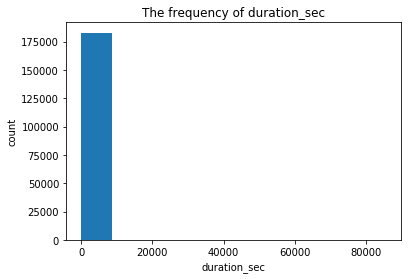

In [99]:
histplot(fordgobike, 'duration_sec')

### Observation of Visualization #1: 
The distribution of logarthimic scale is clumped together so I will apply an axes transformation in the next visualization. 

`Visualization #2`: Applying a logarithmic scale to duration_sec per explanation below:
       I am choosing to apply a logarthimic scale because the range of values in the duration_sec is large, it is ranging from 61 to 85444. The logarthimic scale will flatten the x-axis values so we can visualize the distance between the large range of values. 

### Question:
What is the longest bike trip? Will a logarthimic scale resolve the clumped data in visualization #1?

### Visualization #2

Applying a logarithmic scale to duration_sec per explanation below:
I am choosing to apply a logarthimic scale because the range of values in the duration_sec is large, it is ranging from 61 to 85444. The logarthimic scale will flatten the x-axis values so we can visualize the distance between the large range of values. 

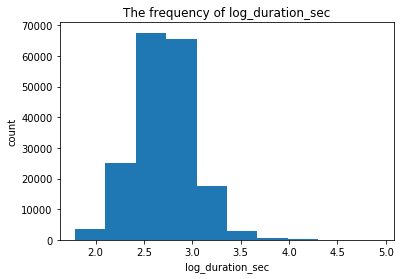

In [110]:
fordgobike['log_duration_sec'] = np.log10(fordgobike['duration_sec'])
histplot(fordgobike, 'log_duration_sec')

### Observation of Visualization #2:
The axes transformation of log10 of duration_sec did resolve the clumped data. But the x-axis need to be relabeled to match the original data points. 

### Question:
What is the longest bike trip? 

`Visualization` #3: Relabeling the x-ticks of the above visualization to match the original data values. Also, labeling the x-axis and title.

In [31]:
# Getting the min and max for duration_sec and log_duration_sec to set the appropriate x-ticks
fordgobike['log_duration_sec'].describe()

count    183412.000000
mean     2.712606     
std      0.309396     
min      1.785330     
25%      2.511883     
50%      2.710963     
75%      2.900913     
max      4.931682     
Name: log_duration_sec, dtype: float64

In [32]:
fordgobike['duration_sec'].describe()

count    183412.000000
mean     726.078435   
std      1794.389780  
min      61.000000    
25%      325.000000   
50%      514.000000   
75%      796.000000   
max      85444.000000 
Name: duration_sec, dtype: float64

In [33]:
fordgobike['log_duration_sec'].max()+0.5

5.4316815713472222

In [34]:
x_ticks = [60, 100, 300, 1000, 3000, 10000, 30000, 20000]
np.log10(x_ticks)

array([ 1.77815125,  2.        ,  2.47712125,  3.        ,  3.47712125,
        4.        ,  4.47712125,  4.30103   ])

In [35]:
np.log10(60)

1.7781512503836436

### Visualization #3

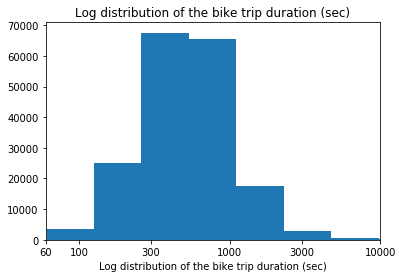

In [106]:
plt.hist(data=fordgobike, x='log_duration_sec')
x_ticks = [60, 100, 300, 1000, 3000, 10000, 30000, 90000]
plt.xticks(np.log10(x_ticks), x_ticks);
plt.xlim(np.log10([60, 10000]))
plt.xlabel('Log distribution of the bike trip duration (sec)')
plt.title('Log distribution of the bike trip duration (sec)');

### Observation #3: The longest trips appear to be in the range of 300 sec - 1000 sec which is about 5- 16 minutes. The shortest trip appears to be around 61 seconds which is about minute. 

In [37]:
fordgobike.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start time,end_date,end time,log_duration_sec
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,17:32:10.145000,2019-03-01,08:01:55.975000,4.717546
1,42521,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,2019-02-28,18:53:21.789000,2019-03-01,06:42:03.056000,4.628603
2,61854,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,12:13:13.218000,2019-03-01,05:24:08.146000,4.791368
3,36490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,17:54:26.010000,2019-03-01,04:02:36.842000,4.562174
4,1585,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,23:54:18.549000,2019-03-01,00:20:44.074000,3.200029


### Question: 
Which start station was visited the most by bike riders?

`Visualization` #4: Plotting the start_station_ids in a bar graph to visualize which station is the most visited and is the starting point for bike riders using ford go bike. 

In [38]:
# looking at the datatype of start_station_id
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               183412 non-null int64
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
start_date                 183412 non-null datetime64[ns]
start time                 183412 non-null object
end_date                   183412 non-null datetime64[ns]
end time          

In [39]:
null_values_stations = null_values_stations.index

In [40]:
# dropping null values in start_station_id prior to plotting the bar graph
fordgobike_copy = fordgobike # making a copy of the data prior to dropping null values because I do not want to drop any values from the original df
fordgobike_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               183412 non-null int64
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
start_date                 183412 non-null datetime64[ns]
start time                 183412 non-null object
end_date                   183412 non-null datetime64[ns]
end time          

In [41]:
fordgobike_copy = fordgobike_copy.drop(index=null_values_stations, axis=0)

In [42]:
fordgobike_copy.isnull().sum()

duration_sec               0   
start_station_id           0   
start_station_name         0   
start_station_latitude     0   
start_station_longitude    0   
end_station_id             0   
end_station_name           0   
end_station_latitude       0   
end_station_longitude      0   
bike_id                    0   
user_type                  0   
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip    0   
start_date                 0   
start time                 0   
end_date                   0   
end time                   0   
log_duration_sec           0   
dtype: int64

In [43]:
# start_station_id is a float datatype object and the .0 is not needed
# extracting the .0 so the start_station_id can be assigned to an integer datatype
fordgobike_copy['start_station_id'] = fordgobike_copy['start_station_id'].astype(int)


In [44]:
fordgobike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               183215 non-null int64
start_station_id           183215 non-null int64
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null int64
user_type                  183215 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    183215 non-null object
start_date                 183215 non-null datetime64[ns]
start time                 183215 non-null object
end_date                   183215 non-null datetime64[ns]
end time            

In [45]:
fordgobike_copy['start_station_id'].describe()

count    183215.000000
mean     138.590427   
std      111.778864   
min      3.000000     
25%      47.000000    
50%      104.000000   
75%      239.000000   
max      398.000000   
Name: start_station_id, dtype: float64

### Visualization #4

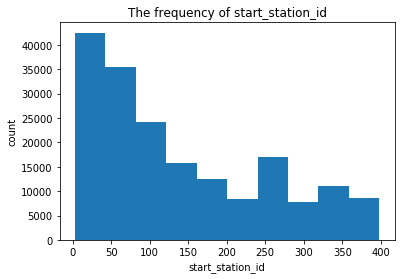

In [107]:
histplot(fordgobike_copy, 'start_station_id');

### Observation #4: 
The distribution for the start_station_id is right skewed so an axes transformation will be tried to transform the data at the next visualization. 

### Question:

`Visualization` #5: I am choosing to apply a logarthimic scale to the above plot because the histogram is right-skewed and logarthimic scale will flatten the x-axis values so we can visualize the distance between the large range of values.

In [47]:
fordgobike_copy['log_start_station_id'] = np.log(fordgobike_copy['start_station_id'])
fordgobike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 20 columns):
duration_sec               183215 non-null int64
start_station_id           183215 non-null int64
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null int64
user_type                  183215 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    183215 non-null object
start_date                 183215 non-null datetime64[ns]
start time                 183215 non-null object
end_date                   183215 non-null datetime64[ns]
end time            

In [48]:
fordgobike_copy['log_start_station_id'].describe()

count    183215.000000
mean     4.451206     
std      1.154390     
min      1.098612     
25%      3.850148     
50%      4.644391     
75%      5.476464     
max      5.986452     
Name: log_start_station_id, dtype: float64

### Visualization #5:

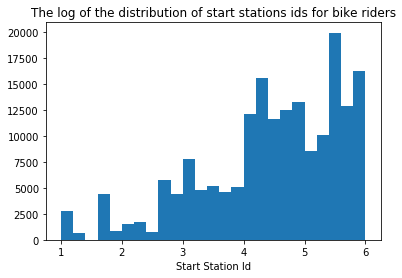

In [108]:
bins = np.arange(1, fordgobike_copy['log_start_station_id'].max()+0.20, 0.20)
plt.hist(data=fordgobike_copy, x='log_start_station_id', bins = bins);
plt.xlabel('Start Station Id')
plt.title('The log of the distribution of start stations ids for bike riders');


### Observations of Visualization #5: The log10 axes transformation of the start station ids did not produce a normal distribution, it transferred a right skewed distribution (in visualization #4) to a left skewed distribution. 

### Question:
    

`Visualization` #6: Application of log10 axes transformation was unsucessful. A square root axes transformation will be performed in the next visualization to reduce the skeweness of the distribution. 

In [50]:
fordgobike_copy['sqrt_station_ids'] = np.sqrt(fordgobike_copy['start_station_id'])
fordgobike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 21 columns):
duration_sec               183215 non-null int64
start_station_id           183215 non-null int64
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null int64
user_type                  183215 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    183215 non-null object
start_date                 183215 non-null datetime64[ns]
start time                 183215 non-null object
end_date                   183215 non-null datetime64[ns]
end time            

In [51]:
fordgobike_copy['sqrt_station_ids'].describe()

count    183215.000000
mean     10.659840    
std      4.995835     
min      1.732051     
25%      6.855655     
50%      10.198039    
75%      15.459625    
max      19.949937    
Name: sqrt_station_ids, dtype: float64

In [52]:
fordgobike_copy['start_station_id'].describe()

count    183215.000000
mean     138.590427   
std      111.778864   
min      3.000000     
25%      47.000000    
50%      104.000000   
75%      239.000000   
max      398.000000   
Name: start_station_id, dtype: float64

### Visualization #6

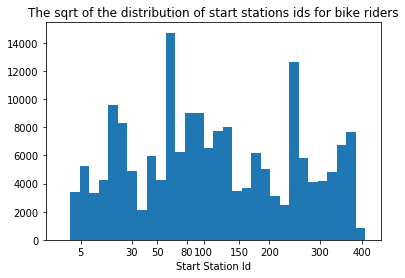

In [53]:
bins = np.arange(1,fordgobike_copy['sqrt_station_ids'].max()+0.6, 0.6)
plt.hist(data=fordgobike_copy, x='sqrt_station_ids', bins = bins)
x_ticks = [5, 30, 50, 80, 100, 150, 200, 300, 400]
plt.xticks(np.sqrt(x_ticks), x_ticks)
plt.xlabel('Start Station Id')
plt.title('The sqrt of the distribution of start stations ids for bike riders');

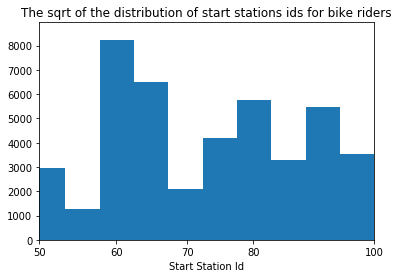

In [54]:
bins = np.arange(1,fordgobike_copy['sqrt_station_ids'].max()+0.3, 0.3)
plt.hist(data=fordgobike_copy, x='sqrt_station_ids', bins = bins)
x_ticks = [5, 30, 50, 60, 70, 80,100, 150, 200, 250, 300, 400]
plt.xticks(np.sqrt(x_ticks), x_ticks)
plt.xlabel('Start Station Id')
plt.xlim(np.sqrt([50, 100]))
plt.title('The sqrt of the distribution of start stations ids for bike riders');

In [55]:
fordgobike_copy['start_station_id'].value_counts()

58     3904
67     3544
81     3052
21     2895
3      2760
15     2710
30     2703
5      2327
22     2293
16     2283
6      2082
239    1796
243    1770
50     1765
66     1753
17     1746
27     1719
44     1611
90     1573
93     1552
23     1458
19     1376
245    1375
104    1360
61     1314
114    1303
126    1290
182    1276
350    1203
256    1203
       ... 
361    57  
217    55  
209    55  
46     53  
283    50  
358    50  
297    49  
318    48  
362    36  
228    35  
287    34  
288    34  
307    32  
290    31  
298    30  
378    29  
359    25  
229    23  
303    19  
226    19  
225    18  
234    18  
388    17  
398    17  
389    13  
301    9   
51     7   
224    4   
300    4   
344    2   
Name: start_station_id, Length: 329, dtype: int64

In [56]:
fordgobike_copy.loc[fordgobike_copy['start_station_id'] == 58]

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start time,end_date,end time,log_duration_sec,log_start_station_id,sqrt_station_ids
38,1066,58,Market St at 10th St,37.776619,-122.417385,145.0,29th St at Church St,37.743684,-122.426806,5938,...,1992.0,Female,No,2019-02-28,23:31:16.139000,2019-02-28,23:49:02.792000,3.027757,4.060443,7.615773
54,401,58,Market St at 10th St,37.776619,-122.417385,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,5407,...,1990.0,Female,No,2019-02-28,23:30:52.471000,2019-02-28,23:37:33.955000,2.603144,4.060443,7.615773
110,371,58,Market St at 10th St,37.776619,-122.417385,98.0,Valencia St at 16th St,37.765052,-122.421866,6435,...,1994.0,Male,No,2019-02-28,23:01:15.077000,2019-02-28,23:07:26.459000,2.569374,4.060443,7.615773
114,376,58,Market St at 10th St,37.776619,-122.417385,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5731,...,1982.0,Male,No,2019-02-28,23:00:05.223000,2019-02-28,23:06:21.515000,2.575188,4.060443,7.615773
190,515,58,Market St at 10th St,37.776619,-122.417385,321.0,5th St at Folsom,37.780146,-122.403071,5234,...,1981.0,Other,No,2019-02-28,22:28:11.347000,2019-02-28,22:36:46.389000,2.711807,4.060443,7.615773
296,535,58,Market St at 10th St,37.776619,-122.417385,16.0,Steuart St at Market St,37.794130,-122.394430,5546,...,1986.0,Male,No,2019-02-28,21:57:24.567000,2019-02-28,22:06:19.605000,2.728354,4.060443,7.615773
344,720,58,Market St at 10th St,37.776619,-122.417385,70.0,Central Ave at Fell St,37.773311,-122.444293,4744,...,1994.0,Male,No,2019-02-28,21:41:23.071000,2019-02-28,21:53:23.178000,2.857332,4.060443,7.615773
446,613,58,Market St at 10th St,37.776619,-122.417385,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,4716,...,1989.0,Male,No,2019-02-28,21:20:20.385000,2019-02-28,21:30:33.796000,2.787460,4.060443,7.615773
530,309,58,Market St at 10th St,37.776619,-122.417385,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,4960,...,1994.0,Male,No,2019-02-28,21:10:53.023000,2019-02-28,21:16:02.716000,2.489958,4.060443,7.615773
610,238,58,Market St at 10th St,37.776619,-122.417385,44.0,Civic Center/UN Plaza BART Station (Market St at McAllister St),37.781074,-122.411738,6456,...,1991.0,Male,No,2019-02-28,20:56:59.112000,2019-02-28,21:00:57.439000,2.376577,4.060443,7.615773


### Observation of `visualization` #6: The most visited start station id appears to be between 50 and 100. Upon adjusting the x-axes limit, it seems that the station is close to 60. After programmatic assessement of the ford go bike df and getting the descending order of the unique values. The most visited start station id is 58 and the corresponding station name is Market St at 10th St.

### Question: 
Which of the two user types, customer or subscriber, uses the Ford Go Bike sharing system more frequently?

`Visualization` #7: Customer versus Subscribers.

In [57]:
fordgobike['user_type'].value_counts()

Subscriber    163544
Customer      19868 
Name: user_type, dtype: int64

### Visualization #7

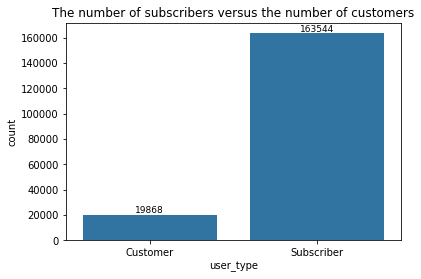

In [58]:
base_color = sb.color_palette()[0]
ax = sb.countplot(data=fordgobike, x='user_type', color=base_color)
ax.set(title='The number of subscribers versus the number of customers')

# to label the top of the bars, iterate through the two bars and label using text function

for i in ax.patches: # patches in a 2D object in pandas that represents a visual shape of a matplotlib 
    ax.text(i.get_x() + i.get_width()/2., i.get_height(), '%d' % int(i.get_height()), 
            fontsize=9, color='black', ha='center', va='bottom') # horizontal axis or vertical alignment 

plt.show()

sources for the above plot- 

    *https://www.tutorialspoint.com/matplotlib-how-to-show-the-count-values-on-the-top-of-a-bar-in-a-countplot
    
    *https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html
    
    *https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9

### Visualization #7: The highest number of bike riders are in the subscribers category with a about 140000 difference from the customer category.

### Question:
Which month is the most popular for bike rides?

`Visualization`#8: The occurence of each month for bike rikes. Which month is the most popular for bike rides?
Extracting the months from the start_date and plotting it as a histogram. 


In [59]:
fordgobike['Month'] = fordgobike['start_date'].dt.month
fordgobike.head()

# source- https://sparkbyexamples.com/pandas/pandas-extract-month-and-year-separately-from-datetime-column/

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start time,end_date,end time,log_duration_sec,Month
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,17:32:10.145000,2019-03-01,08:01:55.975000,4.717546,2
1,42521,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,2019-02-28,18:53:21.789000,2019-03-01,06:42:03.056000,4.628603,2
2,61854,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,12:13:13.218000,2019-03-01,05:24:08.146000,4.791368,2
3,36490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,17:54:26.010000,2019-03-01,04:02:36.842000,4.562174,2
4,1585,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,23:54:18.549000,2019-03-01,00:20:44.074000,3.200029,2


In [60]:
fordgobike['Year'] = fordgobike['start_date'].dt.year
fordgobike

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start time,end_date,end time,log_duration_sec,Month,Year
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,...,1984.0,Male,No,2019-02-28,17:32:10.145000,2019-03-01,08:01:55.975000,4.717546,2,2019
1,42521,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,...,NaN,NaN,No,2019-02-28,18:53:21.789000,2019-03-01,06:42:03.056000,4.628603,2,2019
2,61854,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,...,1972.0,Male,No,2019-02-28,12:13:13.218000,2019-03-01,05:24:08.146000,4.791368,2,2019
3,36490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,...,1989.0,Other,No,2019-02-28,17:54:26.010000,2019-03-01,04:02:36.842000,4.562174,2,2019
4,1585,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,...,1974.0,Male,Yes,2019-02-28,23:54:18.549000,2019-03-01,00:20:44.074000,3.200029,2,2019
5,1793,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,...,1959.0,Male,No,2019-02-28,23:49:58.632000,2019-03-01,00:19:51.760000,3.253580,2,2019
6,1147,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,...,1983.0,Female,No,2019-02-28,23:55:35.104000,2019-03-01,00:14:42.588000,3.059563,2,2019
7,1615,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,...,1989.0,Male,No,2019-02-28,23:41:06.766000,2019-03-01,00:08:02.756000,3.208173,2,2019
8,1570,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,...,1988.0,Other,No,2019-02-28,23:41:48.790000,2019-03-01,00:07:59.715000,3.195900,2,2019
9,1049,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,...,1992.0,Male,No,2019-02-28,23:49:47.699000,2019-03-01,00:07:17.025000,3.020775,2,2019


In [61]:
fordgobike['Day'] = fordgobike['start_date'].dt.day
fordgobike['Day'].value_counts()

28    9829
20    9667
21    9536
19    9467
7     9234
22    9204
6     9057
11    8681
5     8486
12    8473
27    7715
15    7288
25    7033
14    6598
8     6356
1     6133
18    5647
4     5491
23    5451
26    5387
24    4497
17    4225
16    3993
10    3960
2     3231
13    3202
3     2841
9     2730
Name: Day, dtype: int64

### Visualization #8: 

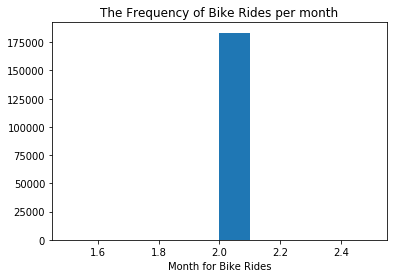

In [62]:
plt.hist(data=fordgobike, x='Month');
plt.xlabel('Month for Bike Rides')
plt.title('The Frequency of Bike Rides per month');

Text(0.5,0,'Days in Feburary')

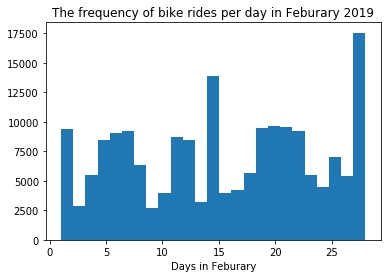

In [63]:
plt.hist(data=fordgobike, x='Day', bins = 25);
plt.title('The frequency of bike rides per day in Feburary 2019')
plt.xlabel('Days in Feburary')

### Observation of Visualization #8: 
The dataset of over 180000 values is for the month of feburary so the frequency of bike rides per day in feburary was plotted. Per the plot- The frequency of bike rides per day in Feburary 2019, the most bike rides occured towards the end of Feburary. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The variables explored in the above 6 visualizations are duration_sec and start_station_id. duration_sec did not have any outliers or null values. But start_station_id did have null values that were removed from the copy of the dataframe prior to plotting the histogram.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The variables explored in the above 6 visualizations are duration_sec and start_station_id. Both variables outputted a skewed distribution so a log10 axes transformation was performed on the duration_sec data and a sqrt axes transformation was performed on the start_station_id data. 

There are a couple of reasons to perform an axes transformation, one is to reduce a left or right skewed data distribution, which in this case was the start_station_id. Another reason is that the skewed data distribution can make it challenging to perform parametric tests so it is essential to transform the data to a normal bell curve. 

source- https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Question:
What is the relationship between the starting point for the bike rider and the duration of the trip. 

`Visualization` #9: Plotting duration_sec and start_station_id to investigate the relationship between the starting point for the bike rider and the duration of the trip. 

In [64]:
fordgobike_copy[['start_station_id', 'duration_sec']].describe()

,start_station_id,duration_sec
count,183215.000000,183215.000000
mean,138.590427,725.902017
std,111.778864,1795.078654
min,3.000000,61.000000
25%,47.000000,325.000000
50%,104.000000,514.000000
75%,239.000000,796.000000
max,398.000000,85444.000000


In [65]:
fordgobike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 21 columns):
duration_sec               183215 non-null int64
start_station_id           183215 non-null int64
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null int64
user_type                  183215 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    183215 non-null object
start_date                 183215 non-null datetime64[ns]
start time                 183215 non-null object
end_date                   183215 non-null datetime64[ns]
end time            

### Visualization #9:

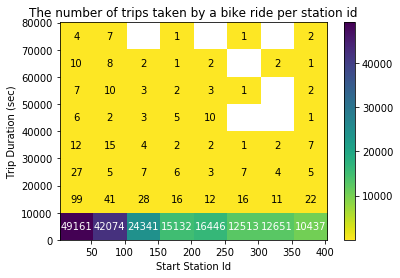

In [66]:
# plot of start_station_id and duration_sec
# both quantitative variables so a scatter plot can be used to depict their linear relationship
bins_x = np.arange(3, fordgobike_copy['start_station_id'].max()+50, 50)
bins_y = np.arange(60, fordgobike_copy['duration_sec'].max()+100, 10000)
h2d = plt.hist2d(data=fordgobike_copy, x='start_station_id', y='duration_sec', bins = [bins_x, bins_y], cmap='viridis_r', cmin=0.5)
plt.colorbar()
plt.xlabel('Start Station Id')
plt.ylabel('Trip Duration (sec)')

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

#Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]): # the shape is going to be 3000(x value) 
    for j in range(counts.shape[1]): # accounting for the 40 (x value)
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+25, bins_y[j]+5000, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+25, bins_y[j]+5000, int(c),
                    ha = 'center', va = 'center', color = 'black')

plt.title('The number of trips taken by a bike ride per station id');



Source for the above plot: https://learn.udacity.com/nanodegrees/nd002/parts/cd0016/lessons/ls2236/concepts/8362839f-fc54-4121-a7e9-eb59a8070a04

In [67]:
trips_per_station = fordgobike_copy.loc[fordgobike_copy['start_station_id'].between(0,52)]
trips_per_station

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start time,end_date,end time,log_duration_sec,log_start_station_id,sqrt_station_ids
0,52185,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,...,1984.0,Male,No,2019-02-28,17:32:10.145000,2019-03-01,08:01:55.975000,4.717546,3.044522,4.582576
1,42521,23,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,...,NaN,NaN,No,2019-02-28,18:53:21.789000,2019-03-01,06:42:03.056000,4.628603,3.135494,4.795832
4,1585,7,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,...,1974.0,Male,Yes,2019-02-28,23:54:18.549000,2019-03-01,00:20:44.074000,3.200029,1.945910,2.645751
7,1615,10,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,...,1989.0,Male,No,2019-02-28,23:41:06.766000,2019-03-01,00:08:02.756000,3.208173,2.302585,3.162278
8,1570,10,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,...,1988.0,Other,No,2019-02-28,23:41:48.790000,2019-03-01,00:07:59.715000,3.195900,2.302585,3.162278
9,1049,19,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,...,1992.0,Male,No,2019-02-28,23:49:47.699000,2019-03-01,00:07:17.025000,3.020775,2.944439,4.358899
11,506,44,Civic Center/UN Plaza BART Station (Market St at McAllister St),37.781074,-122.411738,343.0,Bryant St at 2nd St,37.783172,-122.393572,5848,...,1993.0,Male,No,2019-02-28,23:56:55.540000,2019-03-01,00:05:21.733000,2.704151,3.784190,6.633250
26,385,6,The Embarcadero at Sansome St,37.804770,-122.403234,15.0,San Francisco Ferry Building (Harry Bridges Plaza),37.795392,-122.394203,6531,...,2000.0,Male,No,2019-02-28,23:49:24.399000,2019-02-28,23:55:50.284000,2.585461,1.791759,2.449490
31,223,28,The Embarcadero at Bryant St,37.787168,-122.388098,50.0,2nd St at Townsend St,37.780526,-122.390288,6267,...,1993.0,Male,No,2019-02-28,23:49:27.027000,2019-02-28,23:53:10.535000,2.348305,3.332205,5.291503
40,328,7,Frank H Ogawa Plaza,37.804562,-122.271738,195.0,Bay Pl at Vernon St,37.812314,-122.260779,5154,...,1971.0,Male,No,2019-02-28,23:42:13.910000,2019-02-28,23:47:42.543000,2.515874,1.945910,2.645751


In [68]:
fordgobike_copy.groupby('start_station_id').duration_sec.count()

start_station_id
3      2760
4      610 
5      2327
6      2082
7      827 
8      649 
9      905 
10     793 
11     962 
13     746 
14     796 
15     2710
16     2283
17     1746
18     235 
19     1376
20     1018
21     2895
22     2293
23     1458
24     1161
25     890 
26     782 
27     1719
28     992 
29     386 
30     2703
31     476 
33     363 
34     356 
      ...  
350    1203
351    190 
355    795 
356    647 
357    325 
358    50  
359    25  
360    57  
361    57  
362    36  
363    762 
364    813 
365    305 
368    828 
369    664 
370    746 
371    942 
372    218 
373    254 
375    331 
377    868 
378    29  
380    273 
381    237 
383    347 
385    359 
386    464 
388    17  
389    13  
398    17  
Name: duration_sec, Length: 329, dtype: int64

source for the for loop code in In[133]: https://learn.udacity.com/nanodegrees/nd002/parts/cd0016/lessons/ls2236/concepts/8362839f-fc54-4121-a7e9-eb59a8070a04

### Observation for Visualization #9: 

The station ids which was the starting point of the most bike trips were start_station_ids from 3 to ~ 50 and majority of the bike trips were under 10,000. So the station_id possibly affects the duration of the bike trip.

### Question: Does the duration of the bike trip vary from customers versus subscriber?


In this case, the duration of the bike trip in seconds is investigated for a customer versus a subscriber. 

In [69]:
fordgobike.duration_sec.value_counts()

272      311
324      292
323      291
306      291
305      290
369      287
387      286
274      284
354      283
380      282
297      281
325      281
344      281
341      280
269      280
343      280
270      279
337      278
339      277
287      277
329      277
316      276
280      276
298      276
315      275
336      275
366      275
384      274
264      274
317      274
        ... 
2856     1  
11949    1  
80891    1  
3881     1  
3037     1  
4139     1  
2909     1  
39759    1  
10412    1  
6879     1  
2472     1  
4702     1  
6570     1  
66185    1  
29010    1  
12204    1  
5035     1  
8280     1  
5291     1  
38991    1  
6105     1  
17953    1  
3802     1  
3752     1  
22225    1  
5803     1  
11870    1  
5931     1  
15964    1  
5058     1  
Name: duration_sec, Length: 4752, dtype: int64

### Visualization #10: 

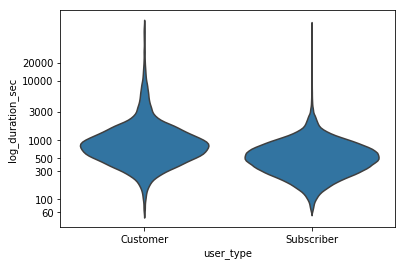

In [70]:
# quantitative (duration_sec) against usertype(categorical)
sb.violinplot(data=fordgobike, x='user_type', y='log_duration_sec', color=base_color, inner= None)
y_ticks = [60, 100, 300, 500, 1000, 3000, 10000, 20000]
plt.yticks(np.log10(y_ticks), y_ticks);
#plt.ylim(np.log10([60, 3000]))

In [71]:
fordgobike.groupby('user_type').duration_sec.mean()

user_type
Customer      1432.465019
Subscriber    640.263678 
Name: duration_sec, dtype: float64

### Observation of Visualization 10: 
The duration of the trip for a customer does vary from a subscriber as there is a higher distribution closer to 1000 seconds for a customer whereas for a subscriber, the largest distribution is around 500. This was confirmed in In [98] via a groupby function of user type and the average of trip duration in seconds.

### Question: Does the day of the month affect the number of bike trips?

### Visualization #11:

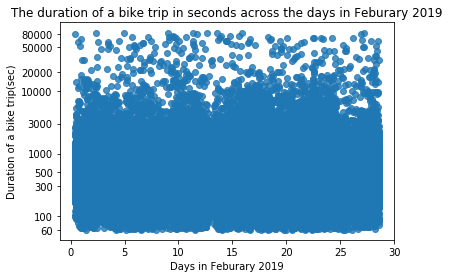

In [72]:
# the days are integer and the number of bike trips are denoted by duration_sec and that is also integer 
sb.regplot(data=fordgobike, x='Day', y='log_duration_sec', x_jitter=0.6, fit_reg=False)
plt.xlabel('Days in Feburary 2019')
plt.ylabel('Duration of a bike trip(sec)')
plt.title('The duration of a bike trip in seconds across the days in Feburary 2019')
y_ticks = [60, 100, 300, 500, 1000, 3000, 10000, 20000,50000, 80000]
plt.yticks(np.log10(y_ticks), y_ticks);

### Observation for visualization #11:

There is overplotting in the above scatter plot of Duration of a bike trip(sec) against days in feburary 2019 so a log_duration_sec will plotted instead of the original data points to see if that resolves the overplotting.

In [73]:
fordgobike[['log_duration_sec', 'Day']].describe()

,log_duration_sec,Day
count,183412.000000,183412.000000
mean,2.712606,15.298977
std,0.309396,8.028187
min,1.785330,1.000000
25%,2.511883,8.000000
50%,2.710963,15.000000
75%,2.900913,22.000000
max,4.931682,28.000000


### Question: Do customers use the bike for completing their bike trips more than subscribers and vice versa?

In [75]:
# bikeshareforalltrips- categorical and user_type(categorical)
# first turn both series of bikeshareforalltrips and user_type into categorical types

responses = fordgobike['bike_share_for_all_trip'].value_counts().index
responses = pd.api.types.CategoricalDtype(ordered=True, categories= responses)

fordgobike['bike_share_for_all_trip'] = fordgobike['bike_share_for_all_trip'].astype(responses)

In [76]:
users = fordgobike['user_type'].value_counts().index
users = pd.api.types.CategoricalDtype(ordered=True, categories= users)

fordgobike['user_type'] = fordgobike['user_type'].astype(users)

In [77]:
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 22 columns):
duration_sec               183412 non-null int64
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null category
start_date                 183412 non-null datetime64[ns]
start time                 183412 non-null object
end_date                   183412 non-null datetime64[ns]
end time      

In [78]:
fordgobike['user_type'].value_counts()

Subscriber    163544
Customer      19868 
Name: user_type, dtype: int64

### Visualization #12:  

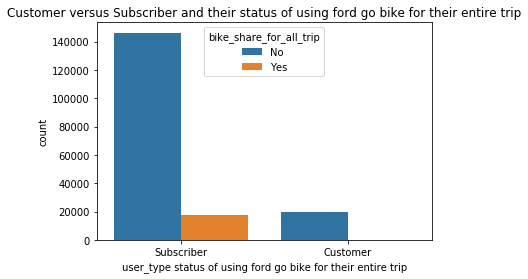

In [79]:
sb.countplot(data=fordgobike, x='user_type', hue='bike_share_for_all_trip')
plt.title('Customer versus Subscriber and their status of using ford go bike for their entire trip');
plt.xlabel('user_type status of using ford go bike for their entire trip');

### Observation #12: The subscribers of ford go bike are using the bike to finish their trips and there are no customers who are finishing their trip by using ford go bike.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


The main features of interest are the duration_sec, start_station_id, user_type, start_date (month/day/year), and the bike_share_for_all_trips. All these features are explored in bivariate exploration. The observations are below:

Observation of visualization # 9: Plotting duration_sec and start_station_id to investigate the relationship between the starting point for the bike rider and the duration of the trip. 

Observation of visualization # 10: The duration of the trip for a customer does vary from a subscriber as there is a higher distribution closer to 1000 seconds for a customer whereas for a subscriber, the largest distribution is around 500. This was confirmed in In [98] via a groupby function of user type and the average of trip duration in seconds.

Observation of visualization #11: The highest number of bike rides occured towards the end of Febuary and were between 100-1000 seconds. 

Observation of visualization #12: The subscribers of ford go bike are using the bike to finish their trips and there are no customers who are finishing their trip by using ford go bike.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, the user_type (customer or subscriber) was an interesting observation because the customers did not use the Ford GoBike to finish their trip. 

## Multivariate Exploration

multivariate plots introduce a third variable per the datatype of the third variable

        if the third variable is numerical, then size is a good marker
        if the third variable is categorical, then shape is a good marker
         
         
x='station_id', y='duration_sec', third='day of the month'

### Question: What is the day of month with the most frequent bike rides and the duration of the most frequent bike ride?

### Visualization #11:

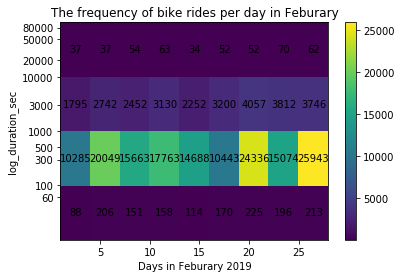

In [74]:
bins_x = np.arange(1, fordgobike['Day'].max()+1, 3)
bins_y = np.arange(1, fordgobike['log_duration_sec'].max()+1, 1)
h2d1 = plt.hist2d(data=fordgobike, x='Day', y='log_duration_sec', cmin=0.5, bins = [bins_x, bins_y]);
y_ticks = [60, 100, 300, 500, 1000, 3000, 10000, 20000,50000, 80000]
plt.yticks(np.log10(y_ticks), y_ticks);
plt.colorbar()

counts = h2d1[0]

#Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]): # the shape is going to be 3000(x value) 
    for j in range(counts.shape[1]): # accounting for the 40 (x value)
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+1.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')
        elif c > 0:
            plt.text(bins_x[i]+1.5, bins_y[j]+0.5, int(c),
                    ha = 'center', va = 'center', color = 'black')

plt.title('The frequency of bike rides per day in Feburary')
plt.xlabel('Days in Feburary 2019')
plt.ylabel('log_duration_sec');

### Observation of visualization #12:
The highest number of bike rides occured towards the end of Febuary and were between 100-1000 seconds. 

### Question: What is the duration of the trip in seconds per station id and day of the month?
    

In [80]:
fordgobike_copy['Day'] = fordgobike['Day']
fordgobike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 22 columns):
duration_sec               183215 non-null int64
start_station_id           183215 non-null int64
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null int64
user_type                  183215 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    183215 non-null object
start_date                 183215 non-null datetime64[ns]
start time                 183215 non-null object
end_date                   183215 non-null datetime64[ns]
end time            

### Visualization #13: 

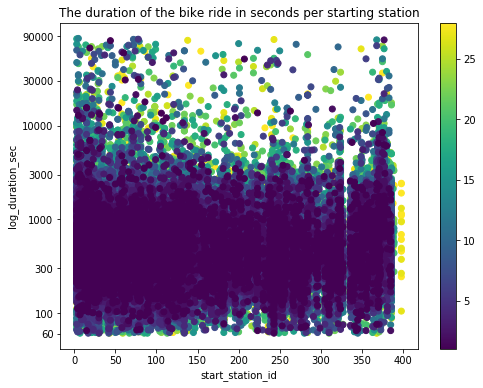

In [81]:
plt.figure(figsize = [8,6])
plt.scatter(data = fordgobike, x = 'start_station_id', y = 'log_duration_sec', c = 'Day')
plt.colorbar()
y_ticks = [60, 100, 300, 1000, 3000, 10000, 30000, 90000]
plt.yticks(np.log10(y_ticks), y_ticks);
plt.xlabel('start_station_id')
plt.ylabel('log_duration_sec')
plt.title('The duration of the bike ride in seconds per starting station');

`Observation` for Visualization #13: The scatter plot to visualize the relationship between start_station_id, log_duration_sec and the day of the month is creating an overplotted scatter plot which is difficult to interpret so the next attemp is to visualize this relationship via a FacetGrid. 

### Question:
What is the duration of the trip in seconds per station id and day of the month?

`Visualization` #14: 

In [82]:
Days = fordgobike['Day'].value_counts().index
Days = pd.api.types.CategoricalDtype(ordered=True, categories= Days)

fordgobike_copy['Day'] = fordgobike['Day'].astype(Days)

In [83]:
order = fordgobike_copy.Day.value_counts().index

### Visualization #14: 

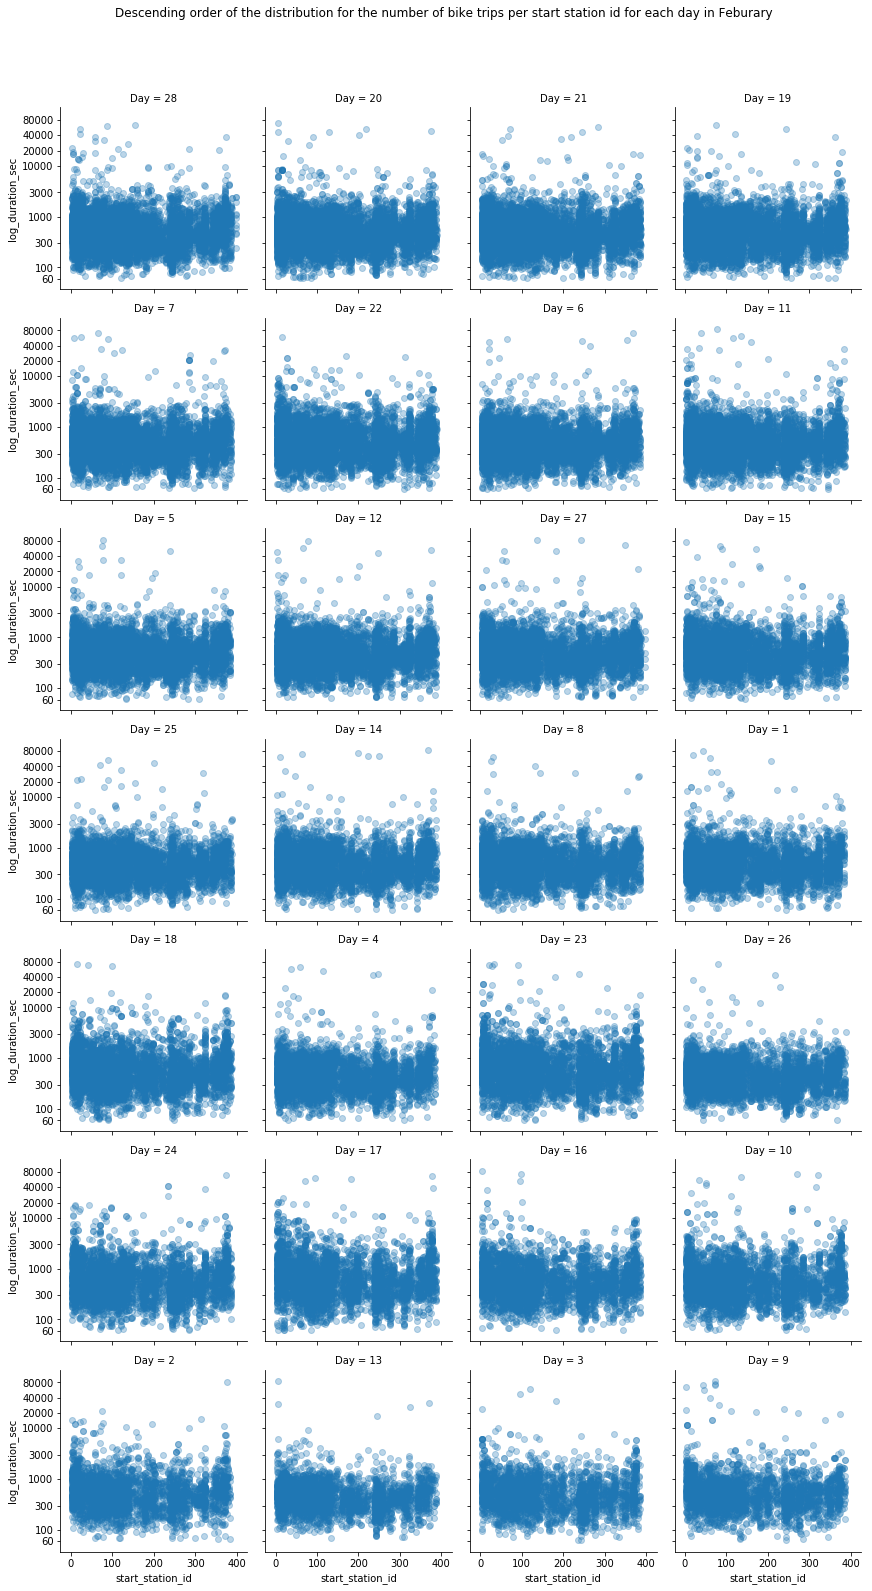

In [84]:
g = sb.FacetGrid(data = fordgobike_copy, col = 'Day', col_wrap = 4, col_order= order)
g.map(plt.scatter, 'start_station_id','log_duration_sec',alpha=0.3)

#source-https://stackoverflow.com/questions/63710551/how-to-format-the-y-or-x-axis-labels-in-a-seaborn-facetgrid
for ax in g.axes.flat:
    y_ticks = [60, 100, 300, 1000, 3000, 10000, 20000, 40000, 80000]
    ax.set_yticks(np.log10(y_ticks))
    ax.set_yticklabels(y_ticks)

plt.suptitle('Descending order of the distribution for the number of bike trips per start station id for each day in Feburary', y=1.05);

`Observation` for Visualization #14: The FacetGrid for the distribution for the number of bike trips for start_station_ids for each day in Feburary appears to be a bit overplotted. But since it is in descending order the highest number of bike trips were taken on Feburary 28th with majority of them being under 10000 seconds. 

### Question:
What is the average time for trip per hour and day?

`Visualization` #15: source for the #15 visualization: https://knowledge.udacity.com/questions/772086


In [85]:
fordgobike['Day_Name'] = fordgobike['start_date'].dt.day_name()
fordgobike['Day_Name'].value_counts()

Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: Day_Name, dtype: int64

In [86]:
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 23 columns):
duration_sec               183412 non-null int64
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null category
start_date                 183412 non-null datetime64[ns]
start time                 183412 non-null object
end_date                   183412 non-null datetime64[ns]
end time      

In [87]:
fordgobike['start time'] = pd.to_datetime(fordgobike['start time'], format='%H:%M:%S.%f', errors='coerce')
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 23 columns):
duration_sec               183412 non-null int64
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null category
start_date                 183412 non-null datetime64[ns]
start time                 183266 non-null datetime64[ns]
end_date                   183412 non-null datetime64[ns]
end ti

In [88]:
fordgobike['start hour'] = fordgobike['start time'].dt.hour
fordgobike.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,start_date,start time,end_date,end time,log_duration_sec,Month,Year,Day,Day_Name,start hour
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,...,2019-02-28,1900-01-01 17:32:10.145,2019-03-01,08:01:55.975000,4.717546,2,2019,28,Thursday,17.0
1,42521,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,...,2019-02-28,1900-01-01 18:53:21.789,2019-03-01,06:42:03.056000,4.628603,2,2019,28,Thursday,18.0
2,61854,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,...,2019-02-28,1900-01-01 12:13:13.218,2019-03-01,05:24:08.146000,4.791368,2,2019,28,Thursday,12.0
3,36490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,...,2019-02-28,1900-01-01 17:54:26.010,2019-03-01,04:02:36.842000,4.562174,2,2019,28,Thursday,17.0
4,1585,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,...,2019-02-28,1900-01-01 23:54:18.549,2019-03-01,00:20:44.074000,3.200029,2,2019,28,Thursday,23.0


In [89]:
# start_hour=columns, start_day= index and values=average of duration_sec
fordgobike['duration_min'] = fordgobike['duration_sec']/60
avg_trip_time = pd.DataFrame(fordgobike.groupby(['Day_Name', 'start hour']).mean()['duration_min'])
avg_trip_time = avg_trip_time.reset_index()

# source-https://knowledge.udacity.com/questions/618363

In [90]:
avg_trip_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
Day_Name        168 non-null object
start hour      168 non-null float64
duration_min    168 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.0+ KB


In [91]:
#daynames = avg_trip_time['Day_Name'].value_counts().index
#daynames = pd.api.types.CategoricalDtype(ordered=True, categories= daynames)
#avg_trip_time['Day_Name'] = avg_trip_time['Day_Name'].astype(daynames)
#avg_trip_time.info()


In [92]:
avg_trip_time['duration_min'] = avg_trip_time['duration_min'].astype(int)
avg_trip_time['start hour'] = avg_trip_time['start hour'].astype(int)
avg_trip_time['Day_Name'] = pd.Categorical(avg_trip_time['Day_Name'], categories= 
                                                 ['Monday', 'Tuesday', 'Wednesday','Thursday', 
                                                  'Friday', 'Saturday', 'Sunday'], ordered=True)

In [93]:
# pivot data 
avg_trip_time_pivot = pd.pivot_table(avg_trip_time, values='duration_min', index='Day_Name', columns='start hour')
avg_trip_time_pivot

start hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_Name,,,,,,,,,,,,,,,,,,,,,
Monday,12,15,13,18,11,9,9,10,11,10,...,15,13,12,11,10,11,11,10,9,8
Tuesday,26,10,9,9,9,11,8,9,10,10,...,12,12,11,11,9,11,10,11,11,8
Wednesday,10,10,26,26,10,8,8,9,10,10,...,13,12,11,11,11,10,12,9,9,13
Thursday,17,10,41,40,9,9,8,9,11,11,...,11,13,10,12,11,12,10,10,10,12
Friday,11,17,11,10,13,10,9,10,11,10,...,13,12,12,11,11,11,12,13,10,17
Saturday,11,10,29,13,11,12,11,16,12,11,...,16,19,15,13,12,12,12,18,11,14
Sunday,11,9,13,44,15,23,12,22,15,13,...,15,15,15,14,11,14,10,14,13,19


### Visualization #15:

Text(0.5,1,'Average time (minutes) of a bike ride by hour and day')

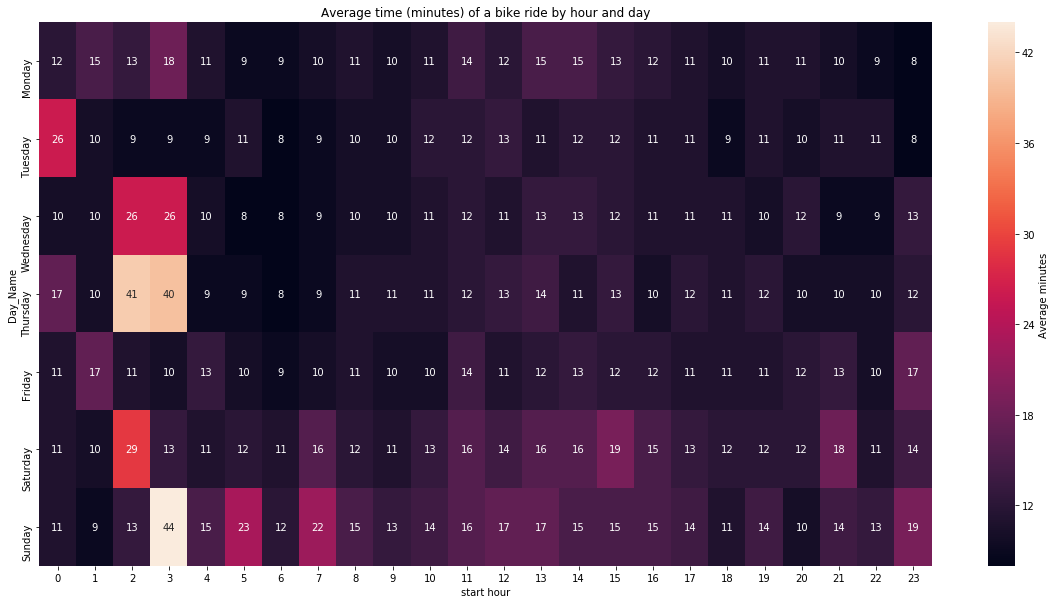

In [94]:
plt.figure(figsize=[20,10])
sb.heatmap(avg_trip_time_pivot, annot=True, cbar_kws = {'label' : 'Average minutes'})
plt.title('Average time (minutes) of a bike ride by hour and day')

### Observation for Visualization #15: 
The highest average time in minutes for bike rides occured on a Sunday between 3 am.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

First relationship observed was in visualization #14 with the distribution of the bike ride duration in seconds against station ids per day in Feburary. It was interesting that the highest number of bike rides occured at the end of Feburary and majority of the rides are short rides under 10000 seconds.

### Were there any interesting or surprising interactions between features?

The suprising interaction was between the average time for a bike ride per day and hour. This plot idea was retrieved from a mentor post (source linked below) and the longest trip taken was at 3 am on a Sunday. 

source- https://knowledge.udacity.com/questions/618363

## Conclusions

The Ford GoBike dataset includes interesting attributes including duration_sec, user_type, start_station_id, start_date, start_time and whether the bike user used the Ford GoBike for their entire trip. 

The preliminary wrangling included the following findings:

`1`. The columns are not expanded in and part of the end_station_name is hidden. 

`2`. The duration_sec can be converted to hours so it is easier to interpret.

`3`. For tidiness, time and date can be separated in two different columns in the start_time and end_time columns.

`4`. Null values in member_birth_year and member_gender- these values cannot be replaced as these values are user entered fields. 

 `5`. Null values in start_station_id and start_station_name- these values cannot be replaced as these values are captured by the database system and is an error in capturing these fields. 
 
 `6`. start time and end time datatypes can be converted to datetime datatypes.
 
The above findings were corrected to start the univariate visualizations for the variables of interest (duration_sec, start_station_id, start_time,start_date,bike_share_for_all_trips, user_type). The univariate visualizations focused on applying logarthimic axes transformation on the duration_sec variable and squart root axes transformation on the start_station_id to normalize the curves and get the insights outlined in the observation markdown cells.

The bivariate visualizations continued the focus on duration_sec, start_station_id, user_type. The plots used were heatmap, violinplot and scatterplot. An overplotting issue was recognized when plotting the days in start_date and log_duration_sec and to fix this issue, the plot type was changed from scatterplot to heatmap. The plot type change fixed the overplotting issue.

The multivariate visualizations continued the focus on duration_sec,start_station_id, and the days of the month from start_date. Another overplotting issue was recognized when plotting a scatter plot of the log_duration_sec against the start_station_id per the days of the month from start_date. The plot was changed to FacetGrid to resolve the overplotting, the FacetGrid provided a distribution per day of the month but it did not fully resolve the issue of overplotting. The overplotting issue was resolved by the solution provided by the mentor in the knowledge portion and the analysis question was changed from:

The duration of the trip in seconds per station id and day of the month to Average Time in minutes by hour and day.

Overall, the Ford GoBike sharing system is a dataset with attributes that provide great insights such as the longest trip taken by a bike rider, the busiest starting point for bike riders, the bike sharing experience for customer versus subscriber and the day of the month of the longest trip. 